In [1]:
import nltk
#nltk.download()

In [2]:
import os
workdir_path = r'./'
os.chdir(workdir_path)

In [3]:
import pandas as pd

data = pd.read_csv('base_reclamacoes.csv', sep= ";", encoding = "ISO-8859-1")
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


# Pré-processamento dos dados

In [4]:
len(data)

42307

In [5]:
print(data.isnull().any())

Regiao           False
estado           False
empresa           True
subsidiaria       True
area              True
serviço          False
problema          True
faixa etarea     False
dtype: bool


In [6]:
#removendo os nulls
data = data.dropna(how='any',axis=0)

print(data.isnull().any())

Regiao           False
estado           False
empresa          False
subsidiaria      False
area             False
serviço          False
problema         False
faixa etarea     False
dtype: bool


In [7]:
#removendo todas as palavras com números e tornando as palavras minúsculas
pd.options.mode.chained_assignment = None
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['problema'] = data.problema.map(lower_alpha)
data['empresa'] = data.empresa.map(lower_alpha)
data['estado'] = data.estado.map(lower_alpha)
data['serviço'] = data.serviço.map(lower_alpha)


data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,sp,itaú unibanco s/a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,"contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
2,Sudeste,sp,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid - pedido de indenização por danos morais,entre 31 a 40 anos
3,Sudeste,sp,gnn garagens ltda - epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"estacionamento ( particular, supermercado, sho...","vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,sp,claro s/a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa ( plano de expansão / compra e ...,"vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos
5,Sudeste,sp,aerovias del continente americano s/a,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens (pacotes turí...,desistência do serviço (artigo - descumprime...,entre 21 a 30 anos


In [8]:
#removendo toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data['problema'] = data.problema.map(punc_re)
data['empresa'] = data.empresa.map(punc_re)
data['estado'] = data.estado.map(punc_re)
data['serviço'] = data.serviço.map(punc_re)



data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,sp,itaú unibanco s a,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos
2,Sudeste,sp,eletropaulo metropolitana eletricidade de s paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos
3,Sudeste,sp,gnn garagens ltda epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos
4,Sudeste,sp,claro s a,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos
5,Sudeste,sp,aerovias del continente americano s a,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos


In [9]:
#removendo os "S/A" das empresas

remove_s_a = lambda x: re.sub(r"""s a""", ' ', x.lower())
remove_s = lambda x: re.sub(r""" s """, ' ', x.lower())
remove_sa = lambda x: re.sub(r""" sa """, ' ', x.lower())
data['empresa'] = data.empresa.map(remove_s_a)
data['empresa'] = data.empresa.map(remove_s)
data['empresa'] = data.empresa.map(remove_sa)

data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,sp,itaú unibanco,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos
2,Sudeste,sp,eletropaulo metropolitana eletricidade de paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos
3,Sudeste,sp,gnn garagens ltda epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos
4,Sudeste,sp,claro,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos
5,Sudeste,sp,aerovias del continente americano,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos


In [10]:
#removendo os "ltda" das empresas

remove_ltda = lambda x: re.sub(r""" ltda """, ' ', x.lower())

data['empresa'] = data.empresa.map(remove_ltda)

In [11]:
#removendo o "etc" dos problemas

remove_etc = lambda x: re.sub(r""" etc """, "", x.lower())
data['problema'] = data.problema.map(remove_etc)
data['serviço'] = data.serviço.map(remove_etc)

# Tokenização

In [12]:
import nltk
from nltk.tokenize import word_tokenize

data['tokens_problema'] = data.problema.map(word_tokenize)
data['tokens_empresa'] = data.empresa.map(word_tokenize)
data['tokens_estado'] = data.estado.map(word_tokenize)
data['tokens_serviço'] = data.serviço.map(word_tokenize)


data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea,tokens_problema,tokens_empresa,tokens_estado,tokens_serviço
0,Sudeste,sp,itaú unibanco,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos,"[contrato, não, cumprimento, alteração, transf...","[itaú, unibanco]",[sp],"[outros, contratos]"
2,Sudeste,sp,eletropaulo metropolitana eletricidade de paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos,"[pid, pedido, de, indenização, por, danos, mor...","[eletropaulo, metropolitana, eletricidade, de,...",[sp],"[energia, elétrica]"
3,Sudeste,sp,gnn garagens epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos,"[vicio, de, qualidade, mal, executado, inadequ...","[gnn, garagens, epp]",[sp],"[estacionamento, particular, supermercado, sho..."
4,Sudeste,sp,claro,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos,"[vicio, de, qualidade, mal, executado, inadequ...",[claro],[sp],"[telefonia, fixa, plano, de, expansão, compra,..."
5,Sudeste,sp,aerovias del continente americano,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos,"[desistência, do, serviço, artigo, descumprime...","[aerovias, del, continente, americano]",[sp],"[agências, e, operadoras, de, viagens, pacotes..."


In [13]:
#lista combinando todos os valores de tokens
word_list_problema = sum(data.tokens_problema.tolist(), [])
word_list_empresa = sum(data.tokens_empresa.tolist(), [])
word_list_estado = sum(data.tokens_estado.tolist(), [])
word_list_serviço = sum(data.tokens_serviço.tolist(), [])

In [14]:
#word_list_problema[:10]
#word_list_empresa[:10]
word_list_estado[:10]
#word_list_serviço[:10]

['sp', 'sp', 'sp', 'sp', 'sp', 'sp', 'sp', 'sp', 'sp', 'sp']

# Stopwords

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop_problema'] = data.tokens_problema.apply(stop_lambda)
data['tokens_stop_empresa'] = data.tokens_empresa.apply(stop_lambda)
data['tokens_stop_estado'] = data.tokens_estado.apply(stop_lambda)
data['tokens_stop_serviço'] = data.tokens_serviço.apply(stop_lambda)

data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea,tokens_problema,tokens_empresa,tokens_estado,tokens_serviço,tokens_stop_problema,tokens_stop_empresa,tokens_stop_estado,tokens_stop_serviço
0,Sudeste,sp,itaú unibanco,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos,"[contrato, não, cumprimento, alteração, transf...","[itaú, unibanco]",[sp],"[outros, contratos]","[contrato, cumprimento, alteração, transferenc...","[itaú, unibanco]",[sp],"[outros, contratos]"
2,Sudeste,sp,eletropaulo metropolitana eletricidade de paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos,"[pid, pedido, de, indenização, por, danos, mor...","[eletropaulo, metropolitana, eletricidade, de,...",[sp],"[energia, elétrica]","[pid, pedido, indenização, danos, morais]","[eletropaulo, metropolitana, eletricidade, paulo]",[sp],"[energia, elétrica]"
3,Sudeste,sp,gnn garagens epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos,"[vicio, de, qualidade, mal, executado, inadequ...","[gnn, garagens, epp]",[sp],"[estacionamento, particular, supermercado, sho...","[vicio, qualidade, mal, executado, inadequado,...","[gnn, garagens, epp]",[sp],"[estacionamento, particular, supermercado, sho..."
4,Sudeste,sp,claro,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos,"[vicio, de, qualidade, mal, executado, inadequ...",[claro],[sp],"[telefonia, fixa, plano, de, expansão, compra,...","[vicio, qualidade, mal, executado, inadequado,...",[claro],[sp],"[telefonia, fixa, plano, expansão, compra, ven..."
5,Sudeste,sp,aerovias del continente americano,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos,"[desistência, do, serviço, artigo, descumprime...","[aerovias, del, continente, americano]",[sp],"[agências, e, operadoras, de, viagens, pacotes...","[desistência, serviço, artigo, descumprimento]","[aerovias, del, continente, americano]",[sp],"[agências, operadoras, viagens, pacotes, turís..."


# Stemming

In [16]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('portuguese')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem_problema'] = data.tokens_stop_problema.apply(stem_lambda)
data['tokens_stem_empresa'] = data.tokens_stop_empresa.apply(stem_lambda)
data['tokens_stem_serviço'] = data.tokens_stop_serviço.apply(stem_lambda)

data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea,tokens_problema,tokens_empresa,tokens_estado,tokens_serviço,tokens_stop_problema,tokens_stop_empresa,tokens_stop_estado,tokens_stop_serviço,tokens_stem_problema,tokens_stem_empresa,tokens_stem_serviço
0,Sudeste,sp,itaú unibanco,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos,"[contrato, não, cumprimento, alteração, transf...","[itaú, unibanco]",[sp],"[outros, contratos]","[contrato, cumprimento, alteração, transferenc...","[itaú, unibanco]",[sp],"[outros, contratos]","[contrat, cumpriment, alter, transferenc, irre...","[itaú, unibanc]","[outr, contrat]"
2,Sudeste,sp,eletropaulo metropolitana eletricidade de paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos,"[pid, pedido, de, indenização, por, danos, mor...","[eletropaulo, metropolitana, eletricidade, de,...",[sp],"[energia, elétrica]","[pid, pedido, indenização, danos, morais]","[eletropaulo, metropolitana, eletricidade, paulo]",[sp],"[energia, elétrica]","[pid, ped, indeniz, dan, mor]","[eletropaul, metropolitan, eletr, paul]","[energ, elétr]"
3,Sudeste,sp,gnn garagens epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos,"[vicio, de, qualidade, mal, executado, inadequ...","[gnn, garagens, epp]",[sp],"[estacionamento, particular, supermercado, sho...","[vicio, qualidade, mal, executado, inadequado,...","[gnn, garagens, epp]",[sp],"[estacionamento, particular, supermercado, sho...","[vici, qualidad, mal, execut, inadequ, imprópri]","[gnn, garagens, epp]","[estacion, particul, supermerc, shopping]"
4,Sudeste,sp,claro,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos,"[vicio, de, qualidade, mal, executado, inadequ...",[claro],[sp],"[telefonia, fixa, plano, de, expansão, compra,...","[vicio, qualidade, mal, executado, inadequado,...",[claro],[sp],"[telefonia, fixa, plano, expansão, compra, ven...","[vici, qualidad, mal, execut, inadequ, imprópri]",[clar],"[telefon, fix, plan, expansã, compr, vend, loc..."
5,Sudeste,sp,aerovias del continente americano,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos,"[desistência, do, serviço, artigo, descumprime...","[aerovias, del, continente, americano]",[sp],"[agências, e, operadoras, de, viagens, pacotes...","[desistência, serviço, artigo, descumprimento]","[aerovias, del, continente, americano]",[sp],"[agências, operadoras, viagens, pacotes, turís...","[desistent, servic, artig, descumpr]","[aerov, del, continent, american]","[agênc, oper, viagens, pacot, turíst]"


# Part-of-speech tagging

In [17]:
from nltk.tag import pos_tag

pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos_problema'] = (data.tokens_stop_problema.apply(pos_lambda))
data['tokens_pos_empresa'] = (data.tokens_stop_empresa.apply(pos_lambda))
data['tokens_pos_serviço'] = (data.tokens_stop_serviço.apply(pos_lambda))

data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea,tokens_problema,tokens_empresa,...,tokens_stop_problema,tokens_stop_empresa,tokens_stop_estado,tokens_stop_serviço,tokens_stem_problema,tokens_stem_empresa,tokens_stem_serviço,tokens_pos_problema,tokens_pos_empresa,tokens_pos_serviço
0,Sudeste,sp,itaú unibanco,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",outros contratos,contrato não cumprimento alteração transfer...,entre 31 a 40 anos,"[contrato, não, cumprimento, alteração, transf...","[itaú, unibanco]",...,"[contrato, cumprimento, alteração, transferenc...","[itaú, unibanco]",[sp],"[outros, contratos]","[contrat, cumpriment, alter, transferenc, irre...","[itaú, unibanc]","[outr, contrat]","[(contrato, NN), (cumprimento, NN), (alteração...","[(itaú, NN), (unibanco, NN)]","[(outros, NNS), (contratos, NNS)]"
2,Sudeste,sp,eletropaulo metropolitana eletricidade de paulo,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,energia elétrica,pid pedido de indenização por danos morais,entre 31 a 40 anos,"[pid, pedido, de, indenização, por, danos, mor...","[eletropaulo, metropolitana, eletricidade, de,...",...,"[pid, pedido, indenização, danos, morais]","[eletropaulo, metropolitana, eletricidade, paulo]",[sp],"[energia, elétrica]","[pid, ped, indeniz, dan, mor]","[eletropaul, metropolitan, eletr, paul]","[energ, elétr]","[(pid, JJ), (pedido, NN), (indenização, NN), (...","[(eletropaulo, NN), (metropolitana, NNS), (ele...","[(energia, NN), (elétrica, NN)]"
3,Sudeste,sp,gnn garagens epp,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,estacionamento particular supermercado sho...,vicio de qualidade mal executado inadequado ...,entre 31 a 40 anos,"[vicio, de, qualidade, mal, executado, inadequ...","[gnn, garagens, epp]",...,"[vicio, qualidade, mal, executado, inadequado,...","[gnn, garagens, epp]",[sp],"[estacionamento, particular, supermercado, sho...","[vici, qualidad, mal, execut, inadequ, imprópri]","[gnn, garagens, epp]","[estacion, particul, supermerc, shopping]","[(vicio, NN), (qualidade, NN), (mal, JJ), (exe...","[(gnn, NN), (garagens, NNS), (epp, VBP)]","[(estacionamento, IN), (particular, JJ), (supe..."
4,Sudeste,sp,claro,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,telefonia fixa plano de expansão compra e ...,vicio de qualidade mal executado inadequado ...,entre 41 a 50 anos,"[vicio, de, qualidade, mal, executado, inadequ...",[claro],...,"[vicio, qualidade, mal, executado, inadequado,...",[claro],[sp],"[telefonia, fixa, plano, expansão, compra, ven...","[vici, qualidad, mal, execut, inadequ, imprópri]",[clar],"[telefon, fix, plan, expansã, compr, vend, loc...","[(vicio, NN), (qualidade, NN), (mal, JJ), (exe...","[(claro, NN)]","[(telefonia, NN), (fixa, NN), (plano, NN), (ex..."
5,Sudeste,sp,aerovias del continente americano,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,agências e operadoras de viagens pacotes turí...,desistência do serviço artigo descumprime...,entre 21 a 30 anos,"[desistência, do, serviço, artigo, descumprime...","[aerovias, del, continente, americano]",...,"[desistência, serviço, artigo, descumprimento]","[aerovias, del, continente, americano]",[sp],"[agências, operadoras, viagens, pacotes, turís...","[desistent, servic, artig, descumpr]","[aerov, del, continent, american]","[agênc, oper, viagens, pacot, turíst]","[(desistência, NN), (serviço, NN), (artigo, NN...","[(aerovias, JJ), (del, NN), (continente, NN), ...","[(agências, JJ), (operadoras, NNS), (viagens, ..."


# Lemmatization

In [18]:
#não ficou bom com stemming, logo, vamos usar lemmatization
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma_problema'] = data.tokens_pos_problema\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])
data['tokens_lemma_empresa'] = data.tokens_pos_empresa\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])
data['tokens_lemma_serviço'] = data.tokens_pos_serviço\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])


data.head().T

,0,2,3,4,5
Regiao,Sudeste,Sudeste,Sudeste,Sudeste,Sudeste
estado,sp,sp,sp,sp,sp
empresa,itaú unibanco,eletropaulo metropolitana eletricidade de paulo,gnn garagens epp,claro,aerovias del continente americano
subsidiaria,BANCO ITAÚ/BANCO UNIBANCO,ELETROPAULO METROPOLITANA,NETPARK.COM.BR,CLARO / NET / EMBRATEL / CLAROTV,AVIANCA INTERNACIONAL
area,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,ESTACIONAMENTO DE VEÍCULOS,TELEFONIA MÓVEL CELULAR,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR
serviço,outros contratos,energia elétrica,estacionamento particular supermercado sho...,telefonia fixa plano de expansão compra e ...,agências e operadoras de viagens pacotes turí...
problema,contrato não cumprimento alteração transfer...,pid pedido de indenização por danos morais,vicio de qualidade mal executado inadequado ...,vicio de qualidade mal executado inadequado ...,desistência do serviço artigo descumprime...
faixa etarea,entre 31 a 40 anos,entre 31 a 40 anos,entre 31 a 40 anos,entre 41 a 50 anos,entre 21 a 30 anos
tokens_problema,"[contrato, não, cumprimento, alteração, transf...","[pid, pedido, de, indenização, por, danos, mor...","[vicio, de, qualidade, mal, executado, inadequ...","[vicio, de, qualidade, mal, executado, inadequ...","[desistência, do, serviço, artigo, descumprime..."
tokens_empresa,"[itaú, unibanco]","[eletropaulo, metropolitana, eletricidade, de,...","[gnn, garagens, epp]",[claro],"[aerovias, del, continente, americano]"


In [19]:
#encontrando as palavras mais comuns
word_list_clean_problema = sum(data.tokens_lemma_problema.tolist(), [])
word_list_clean_empresa = sum(data.tokens_lemma_empresa.tolist(), [])
word_list_clean_estado = sum(data.tokens_stop_estado.tolist(), [])
word_list_clean_serviço = sum(data.tokens_lemma_serviço.tolist(), [])


In [20]:
#word_list_clean_problema[:10]
word_list_clean_empresa[:10]
#word_list_clean_estado[:10]
#word_list_clean_serviço[:10]

['itaú',
 'unibanco',
 'eletropaulo',
 'metropolitana',
 'eletricidade',
 'paulo',
 'gnn',
 'garagens',
 'epp',
 'claro']

In [21]:
from collections import Counter

#convertendo a lista em um dicionário com contagem de valores
word_counts_clean_problema = Counter(word_list_clean_problema)
a = word_counts_clean_problema
word_counts_clean_empresa = Counter(word_list_clean_empresa)
b = word_counts_clean_empresa
word_counts_clean_estado = Counter(word_list_clean_estado)
c = word_counts_clean_estado
word_counts_clean_serviço = Counter(word_list_clean_serviço)
d = word_counts_clean_serviço

#invertendo a chave / valores no dicionário para classificar
word_counts_clean_problema = list(zip(word_counts_clean_problema.values(), word_counts_clean_problema.keys()))
word_counts_clean_empresa = list(zip(word_counts_clean_empresa.values(), word_counts_clean_empresa.keys()))
word_counts_clean_estado = list(zip(word_counts_clean_estado.values(), word_counts_clean_estado.keys()))
word_counts_clean_serviço = list(zip(word_counts_clean_serviço.values(), word_counts_clean_serviço.keys()))


#classificando a lista por contagem
word_counts_clean_problema = sorted(word_counts_clean_problema, reverse=True)
word_counts_clean_empresa = sorted(word_counts_clean_empresa, reverse=True)
word_counts_clean_estado = sorted(word_counts_clean_estado, reverse=True)
word_counts_clean_serviço = sorted(word_counts_clean_serviço, reverse=True)

In [22]:
#imprimindo as 10 palavras mais comuns
#word_counts_clean_problema[:10]
word_counts_clean_empresa[:10]
#word_counts_clean_estado[:10]
#word_counts_clean_serviço[:10]

[(6315, 'ltda'),
 (4177, 'brasil'),
 (2666, 'banco'),
 (1375, 'comercio'),
 (1126, 'telefonica'),
 (1126, 'oi'),
 (1103, 'sa'),
 (922, 'companhia'),
 (794, 'claro'),
 (698, 'celular')]

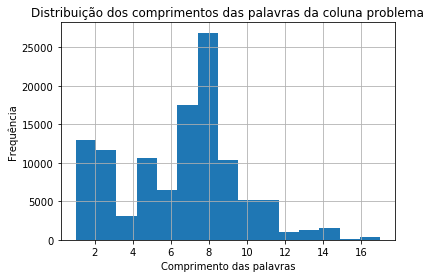

In [23]:
#distribuição dos comprimentos das palavras

word_lengths_problema = pd.Series([len(x) for x in word_list_problema])

ax = word_lengths_problema.hist(bins=15)
ax.set(xlabel='Comprimento das palavras', ylabel='Frequência', title='Distribuição dos comprimentos das palavras da coluna problema');

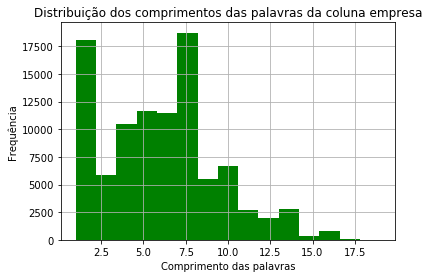

In [24]:
word_lengths_empresa = pd.Series([len(x) for x in word_list_empresa])

bx = word_lengths_empresa.hist(bins=15, color='g')
bx.set(xlabel='Comprimento das palavras', ylabel='Frequência', title='Distribuição dos comprimentos das palavras da coluna empresa');

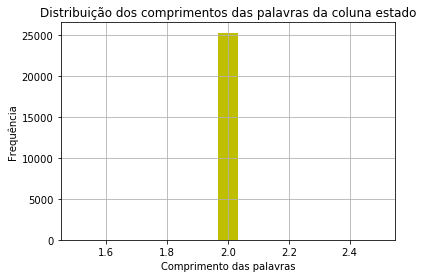

In [25]:
word_lengths_estado = pd.Series([len(x) for x in word_list_estado])

cx = word_lengths_estado.hist(bins=15, color='y')
cx.set(xlabel='Comprimento das palavras', ylabel='Frequência', title='Distribuição dos comprimentos das palavras da coluna estado');

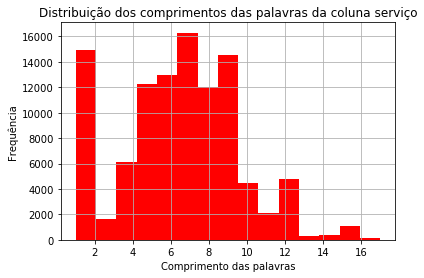

In [26]:
word_lengths_serviço = pd.Series([len(x) for x in word_list_serviço])

dx = word_lengths_serviço.hist(bins=15, color='r')
dx.set(xlabel='Comprimento das palavras', ylabel='Frequência', title='Distribuição dos comprimentos das palavras da coluna serviço');

# Wordclouds

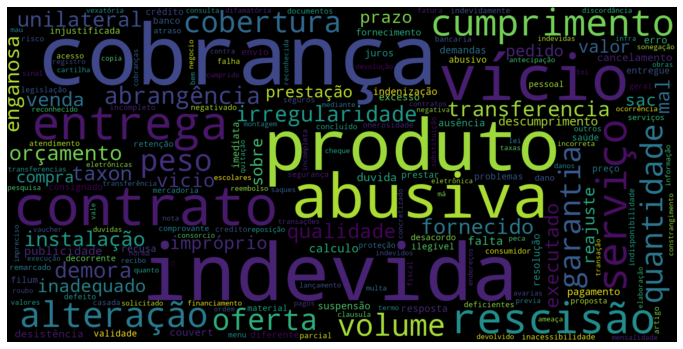

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_problema = word_list_clean_problema
wordcloud_problema = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud_problema, interpolation='bilinear')
plt.axis("off")
plt.show()

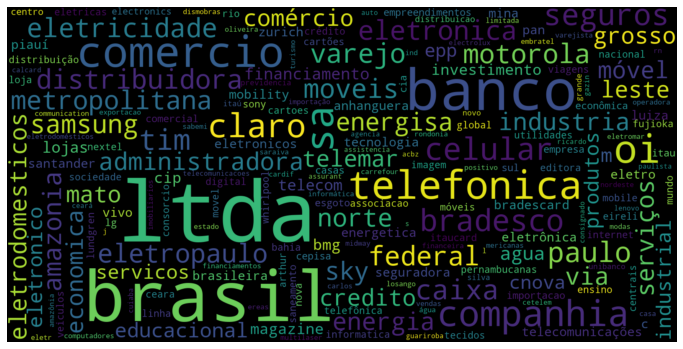

In [28]:
text_empresa = word_list_clean_empresa
wordcloud_empresa = WordCloud(width=1600, height=800, max_font_size=200).fit_words(b)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud_empresa, interpolation='bilinear')
plt.axis("off")
plt.show()

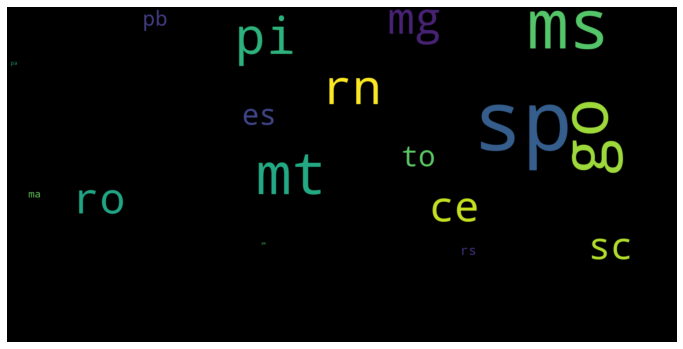

In [29]:
text_estado = word_list_clean_estado
wordcloud_estado = WordCloud(width=1600, height=800, max_font_size=200).fit_words(c)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud_estado, interpolation='bilinear')
plt.axis("off")
plt.show()

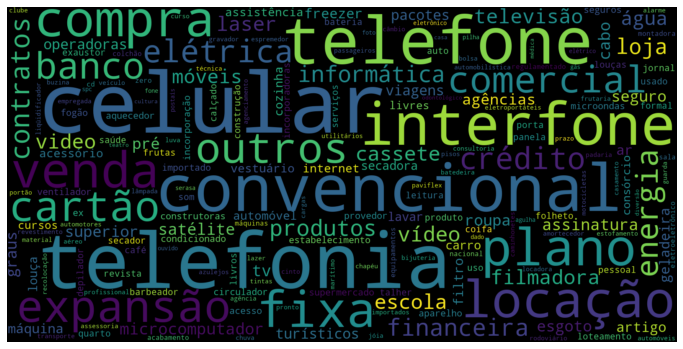

In [30]:
text_serviço = word_list_clean_serviço
wordcloud_serviço = WordCloud(width=1600, height=800, max_font_size=200).fit_words(d)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud_serviço, interpolation='bilinear')
plt.axis("off")
plt.show()